In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import train_test_split
import tqdm
import copy

In [2]:
data = pd.read_csv('googleplaystore.csv')

#EDA

In [3]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
data.shape

(10841, 13)

In [5]:
headers = list(data.columns)
print(headers)

['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver']


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [7]:
data.isnull().any()

App               False
Category          False
Rating             True
Reviews           False
Size              False
Installs          False
Type               True
Price             False
Content Rating     True
Genres            False
Last Updated      False
Current Ver        True
Android Ver        True
dtype: bool

In [8]:
data.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

<Axes: >

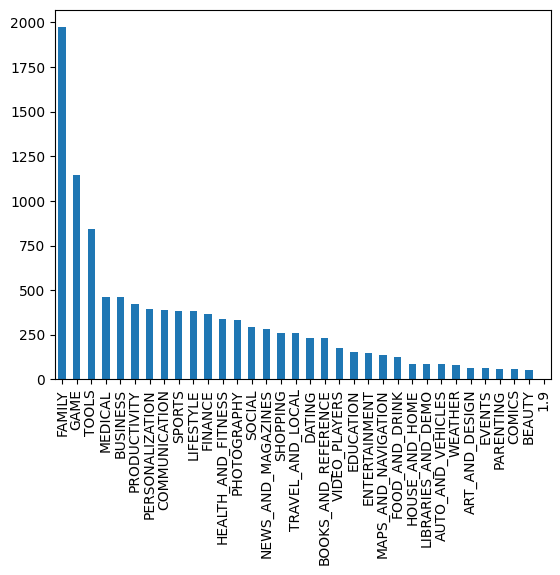

In [9]:
data['Category'].value_counts().plot.bar()

In [10]:
print(len(data['Category'].unique()))

34


Removing special characters unicode characters, filling NaN and converting categorical data to float

In [11]:
data["Size"] = data["Size"].apply(lambda x: str(x).replace('Varies with device', 'NaN') if "Varies with device" in str(x) else x)
data["Size"] = data["Size"].apply(lambda x: str(x).replace('M','') if 'M' in str(x) else x)
data["Size"] = data["Size"].apply(lambda x: str(x).replace(',','') if ',' in str(x) else x)
data['Size'] = data['Size'].apply(lambda x: str(x).replace('+', '') if '+' in str(x) else x)
data['Size'] = data["Size"].apply(lambda x: float(str(x).replace('k',''))/1024 if 'k' in str(x) else x)

In [12]:
data['Installs'] = data['Installs'].apply(lambda a: str(a).replace('+', '') if '+' in str(a) else a)
data['Installs'] = data['Installs'].apply(lambda a: str(a).replace(',', '') if ',' in str(a) else a)
data['Installs'] = data['Installs'].apply(lambda a: str(a).replace('Free', 'NaN') if 'Free' in str(a) else a)

In [13]:
data['Price'] = data['Price'].apply(lambda a: str(a).replace('$', '') if '$' in str(a) else a)
data['Price'] = data['Price'].apply(lambda a: str(a).replace('Everyone', 'NaN') if 'Everyone' in str(a) else a)

In [14]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [15]:
print(f"mean: {data['Rating'].mean()}")
print(f"median: {data['Rating'].median()}")
print(f"mode: {data['Rating'].mode()}")

mean: 4.193338315362443
median: 4.3
mode: 0    4.4
Name: Rating, dtype: float64


In [16]:
#Filling the NaN in ratings with Median values
data['Rating'] = data['Rating'].fillna(data['Rating'].median())

In [17]:
data=data.dropna()

In [18]:
data.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [19]:
data['Size'] = data['Size'].apply(lambda x:float(x))
data['Installs'] = data['Installs'].apply(lambda x:int(x))
data['Reviews'] = data['Reviews'].apply(lambda x:int(x))
data['Price'] = data['Price'].apply(lambda x:float(x))
data['Rating'] = data['Rating'].apply(lambda a: float(a))

In [20]:
data = data.dropna()

In [21]:
print(len(data))

9135


#Visualization

<ipython-input-22-91d6e1ebbe22>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Rating'])


<Axes: xlabel='Rating', ylabel='Density'>

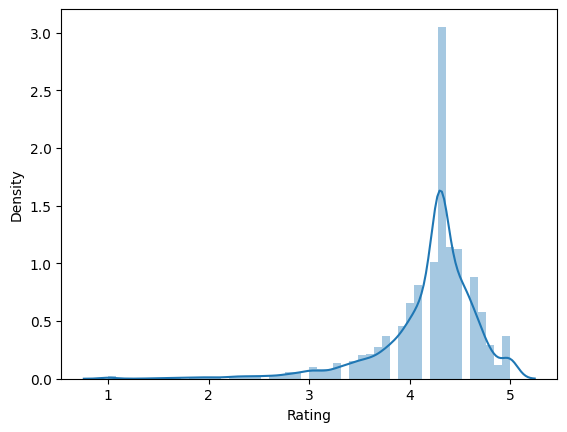

In [22]:
sns.distplot(data['Rating'])

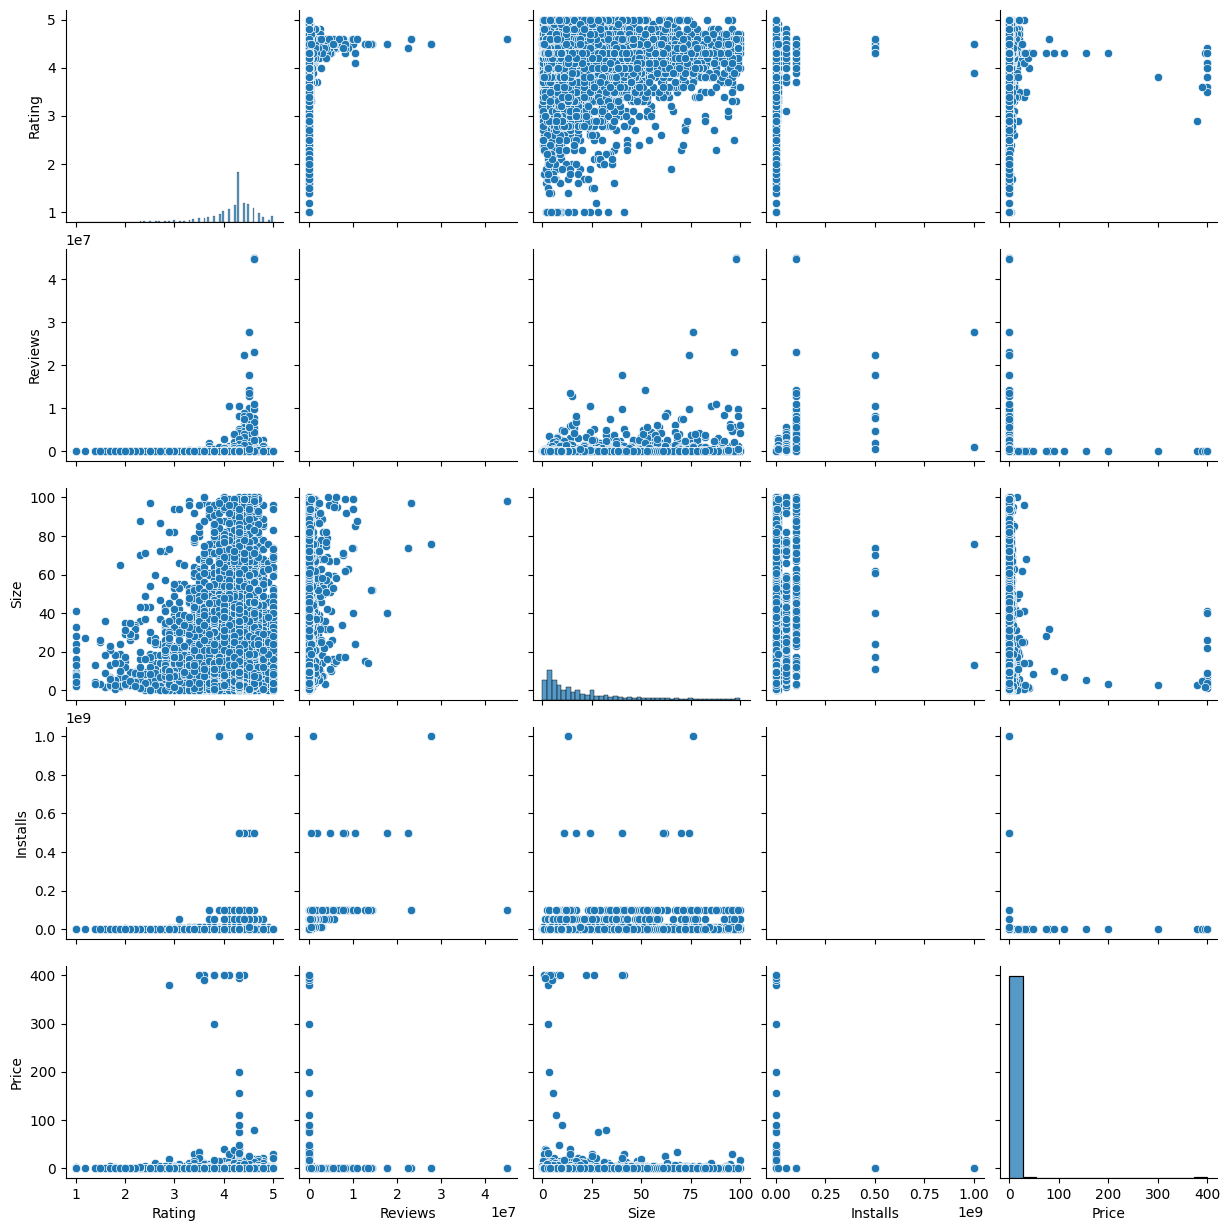

In [23]:
sns.pairplot(data)

<ipython-input-24-8b96879b4d02>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr())


<Axes: >

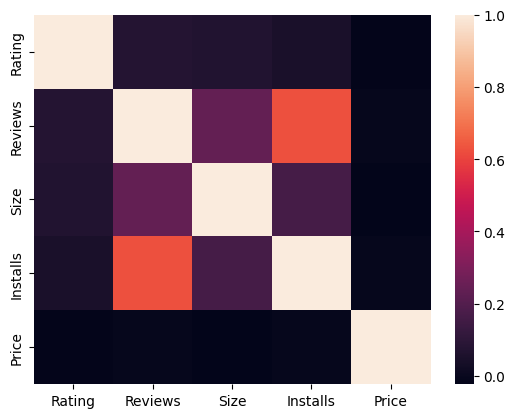

In [24]:
sns.heatmap(data.corr())

In [25]:
cat_col = ['Category','Type','Content Rating', 'Android Ver']
num_col = ['Reviews','Size','Price', 'Installs']
def preprocessFeatures(df):
    features = pd.DataFrame()
    for i in cat_col:
        features[i] = df[i].astype('category')

    features = pd.get_dummies(features[cat_col], drop_first = 'True')

    for i in num_col:
        features[i] = df[i].astype('float')

    return features

def preprocessTargets(df):
    targets = df['Rating'].astype('float')
    return targets

In [26]:
features = preprocessFeatures(data)
targets = preprocessTargets(data)

In [27]:
len(features.columns)

74

In [28]:
print(features.shape)
print(targets.shape)

(9135, 74)
(9135,)


In [29]:
#Splitting the data into training and validation set
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.3, random_state=42) 

#Testting on various models

Bayesian Regression

In [30]:
from sklearn.linear_model import BayesianRidge
br = BayesianRidge(n_iter=1000)
#fitting
br.fit(X_train, y_train)

pred4 = br.predict(X_test)
mae_br = metrics.mean_absolute_error(y_test,pred4)
mse_br = metrics.mean_squared_error(y_test, pred4)
rmse_br = np.sqrt(metrics.mean_squared_error(y_test, pred4))

print( mae_br, mse_br, rmse_br)

0.33947391062869947 0.24827967464110923 0.4982767048950906


Decision Tree Regresssion

In [31]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
#Fitting
dt.fit(X_train,y_train)

pred1 = dt.predict(X_test)
mae_dt = metrics.mean_absolute_error(y_test,pred1)
mse_dt = metrics.mean_squared_error(y_test, pred1)
rmse_dt = np.sqrt(metrics.mean_squared_error(y_test, pred1))

print( mae_dt, mse_dt, rmse_dt)

0.39168186793141213 0.4089164538489602 0.6394657565882321


Random Forest Regression

In [32]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
#fitting
rf.fit(X_train, y_train)

pred2 = rf.predict(X_test)
mae_rf = metrics.mean_absolute_error(y_test,pred2)
mse_rf = metrics.mean_squared_error(y_test, pred2)
rmse_rf = np.sqrt(metrics.mean_squared_error(y_test, pred2))

print( mae_rf, mse_rf, rmse_rf)

0.308888361911711 0.22213261911711046 0.4713094727640327


KNN Regression

In [33]:
from sklearn.neighbors import KNeighborsRegressor
kr = KNeighborsRegressor()
#fitting
kr.fit(X_train, y_train)

pred3 = kr.predict(X_test)
mae_kr = metrics.mean_absolute_error(y_test,pred3)
mse_kr = metrics.mean_squared_error(y_test, pred3)
rmse_kr = np.sqrt(metrics.mean_squared_error(y_test, pred3))

print( mae_kr, mse_kr, rmse_kr)

0.36074425392192633 0.2820891645384896 0.5311206685288096


Tensorflow ANN(64, 32, 16, 1)

In [37]:
import tensorflow as tf
from tensorflow import keras
model = keras.Sequential([
    keras.layers.Dense(64, activation = tf.nn.relu,
                      input_shape = (features.shape[1],)),
    keras.layers.Dense(32, activation = tf.nn.relu),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(16, activation = tf.nn.relu),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(1, activation = tf.nn.relu)
    
])

optimizer = tf.keras.optimizers.Adam()

#The loss is the mean square error and the metric used is the mean absolute error
model.compile(loss='mse',
             optimizer = optimizer,
             metrics = ['mae'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 64)                4800      
                                                                 
 dense_5 (Dense)             (None, 32)                2080      
                                                                 
 batch_normalization_2 (Batc  (None, 32)               128       
 hNormalization)                                                 
                                                                 
 dense_6 (Dense)             (None, 16)                528       
                                                                 
 batch_normalization_3 (Batc  (None, 16)               64        
 hNormalization)                                                 
                                                                 
 dense_7 (Dense)             (None, 1)                

In [40]:
class train_print_cb(keras.callbacks.Callback):

    def on_epoch_end(self, epoch, logs=None):
        keys = list(logs.keys())
        watch = keys[0] ## watching the first key, usually the loss         
        print(f'epoch {epoch} {watch}: {logs[watch]:.3f}          ', end = '\r')

set_epoch = 1000
tf.random.set_seed(42)

# Store training stats
hist = model.fit(X_train, y_train, batch_size= 1000, epochs = set_epoch,
                   validation_data = (X_test,y_test), verbose = 0, callbacks=[train_print_cb()])

In [41]:
hist.history.keys()

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])

In [42]:
print(min(list(hist.history['val_loss'])))

0.25491464138031006


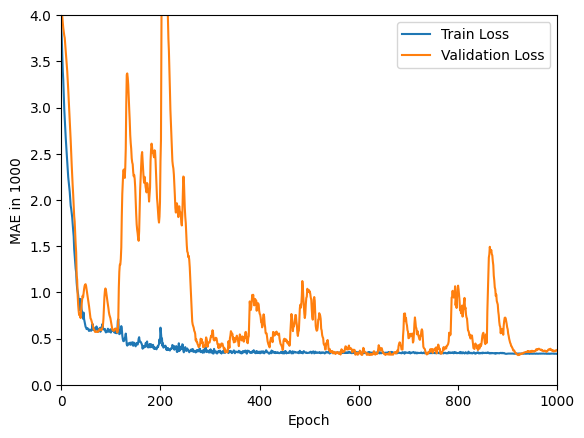

In [43]:
def plot_history(history):
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('MAE in 1000')
  plt.plot(history.epoch, np.array(history.history['mae']), label = 'Train Loss')
  plt.plot(history.epoch, np.array(history.history['val_mae']), label = 'Validation Loss')
  plt.legend()
  plt.xlim([0,1000])
  plt.ylim([0,4])
plot_history(hist)

In [44]:
model.predict(X_test)

86/86 [==============================] - 0s 1ms/step


array([[4.11605  ],
       [4.1120315],
       [4.1124964],
       ...,
       [4.112497 ],
       [4.11266  ],
       [4.1165447]], dtype=float32)

In [46]:
pred = model.predict(X_test)
from sklearn import metrics
mae_tf = metrics.mean_absolute_error(y_test,pred)
mse_tf = metrics.mean_squared_error(y_test, pred)
rmse_tf = np.sqrt(metrics.mean_squared_error(y_test, pred))

print(mae_tf, mse_tf, rmse_tf)

86/86 [==============================] - 0s 1ms/step
0.3729450917861532 0.2661857256112346 0.5159319001682631


Pytorch ANN(74, 128, 256, 128, 64, 1)

In [47]:
import torch
import torch.nn as nn
import torch.optim as optim

model = nn.Sequential(
    nn.Linear(74, 128),
    nn.ReLU(),
    nn.Linear(128, 256),
    nn.ReLU(),
    nn.Linear(256, 128),
    nn.ReLU(),
    nn.Linear(128, 64),
    nn.ReLU(),
    nn.Linear(64, 1)

)

In [48]:
print(model)

Sequential(
  (0): Linear(in_features=74, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=256, bias=True)
  (3): ReLU()
  (4): Linear(in_features=256, out_features=128, bias=True)
  (5): ReLU()
  (6): Linear(in_features=128, out_features=64, bias=True)
  (7): ReLU()
  (8): Linear(in_features=64, out_features=1, bias=True)
)


In [49]:
device = 'cude' if torch.cuda.is_available() else 'cpu'
def df_to_tensor(df):
    return torch.from_numpy(df.values).float()

In [50]:
X_train1 = df_to_tensor(X_train)
y_train1 = df_to_tensor(y_train).reshape(-1, 1)
X_test1 = df_to_tensor(X_test)
y_test1 = df_to_tensor(y_test).reshape(-1, 1)

In [51]:
print(X_train1.shape)
print(y_train1.shape)
print(X_test1.shape)
print(y_test1.shape)

torch.Size([6394, 74])
torch.Size([6394, 1])
torch.Size([2741, 74])
torch.Size([2741, 1])


In [53]:
loss_fn1 = nn.MSELoss()
loss_fn2 = nn.L1Loss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)
n_epochs = 100
batch_size = 10
batch_start = torch.arange(0, len(X_train1), batch_size)
best_mse = np.inf
best_weights1=None
best_mae = np.inf
best_weights2 = None
history=[]

L1_loss: 0.25


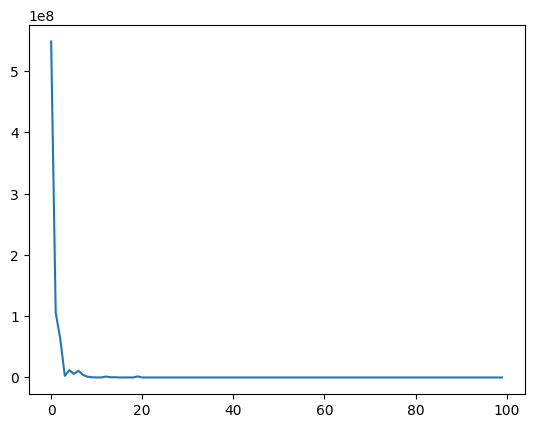

In [54]:
for epoch in range(n_epochs):
    model.train()
    with tqdm.tqdm (batch_start, unit="batch", mininterval=0, disable=True) as bar:
        bar.set_description(f"Epoch {epoch}")
        for start in bar:
            #take a batch
            X_batch = X_train1[start:start+batch_size]
            y_batch = y_train1[start:start+batch_size]
            #forward pass
            y_pred = model(X_batch)
            loss1 = loss_fn2(y_pred, y_batch)
            #backward pass
            optimizer.zero_grad()
            loss1.backward()
            optimizer.step()
            #progress
            bar.set_postfix(mae = float(loss1))
    model.eval()
    y_pred=model(X_test1)
    mae = loss_fn1(y_pred, y_test1)
    mae = float(mae)
    history.append(mae)
    if mae<best_mae:
        best_mae =mae
        best_weights2 = copy.deepcopy(model.state_dict())
#restore the model
model.load_state_dict(best_weights2)
print("L1_loss: %.2f" % best_mae)
plt.plot(history)
plt.show()

In [55]:
def weight_reset(m):
    if isinstance(m, nn.Linear):
        m.reset_parameters()

model.apply(weight_reset)

Sequential(
  (0): Linear(in_features=74, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=256, bias=True)
  (3): ReLU()
  (4): Linear(in_features=256, out_features=128, bias=True)
  (5): ReLU()
  (6): Linear(in_features=128, out_features=64, bias=True)
  (7): ReLU()
  (8): Linear(in_features=64, out_features=1, bias=True)
)

MSE: 3.73
RMSE: 1.93


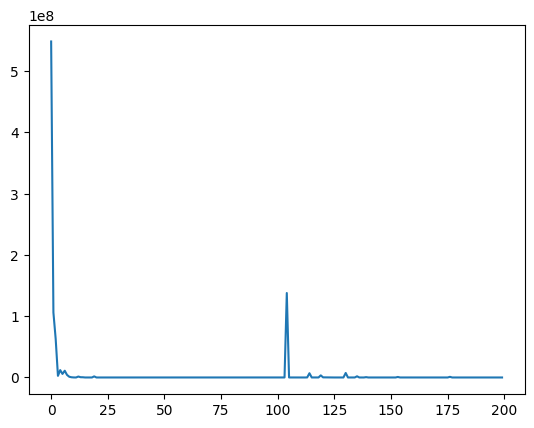

In [56]:
for epoch in range(n_epochs):
    model.train()
    with tqdm.tqdm (batch_start, unit="batch", mininterval=0, disable=True) as bar:
        bar.set_description(f"Epoch {epoch}")
        for start in bar:
            #take a batch
            X_batch = X_train1[start:start+batch_size]
            y_batch = y_train1[start:start+batch_size]
            #forward pass
            y_pred = model(X_batch)
            loss1 = loss_fn1(y_pred, y_batch)
            #backward pass
            optimizer.zero_grad()
            loss1.backward()
            optimizer.step()
            #progress
            bar.set_postfix(mse = float(loss1))
    model.eval()
    y_pred=model(X_test1)
    mse = loss_fn1(y_pred, y_test1)
    mse = float(mse)
    history.append(mse)
    if mse<best_mse:
        best_mse =mse
        best_weights1 = copy.deepcopy(model.state_dict())
#restore the model
model.load_state_dict(best_weights1)
print("MSE: %.2f" % best_mse)
print("RMSE: %.2f" % np.sqrt(best_mse))
plt.plot(history)
plt.show()

In [57]:
a = np.array([mae_br,mse_br,rmse_br])
b = np.array([mae_dt,mse_dt,rmse_dt])
c = np.array([mae_rf,mse_rf,rmse_rf])
d = np.array([mae_kr,mse_kr,rmse_kr])
e = np.array([mae_tf,mse_tf,rmse_tf])
f = np.array([best_mae, best_mse, np.sqrt(best_mse) ])

x = pd.DataFrame(data =[a,b,c,d,e,f], columns = ['MAE','MSE','RMSE'], index = ['Bayesian Regression', 'Decision Tree Regression', 'Random Forest Regression', 'KNN regression', 'Tensorflow ANN(64, 32, 16, 1)', 'Pytorch Linear(74, 128, 256, 128, 64, 1)'])

In [58]:
print(x)

                                               MAE       MSE      RMSE
Bayesian Regression                       0.339474  0.248280  0.498277
Decision Tree Regression                  0.391682  0.408916  0.639466
Random Forest Regression                  0.308888  0.222133  0.471309
KNN regression                            0.360744  0.282089  0.531121
Tensorflow ANN(64, 32, 16, 1)             0.372945  0.266186  0.515932
Pytorch Linear(74, 128, 256, 128, 64, 1)  0.253692  3.726107  1.930313
